Code for scraping Harham.com

In [1]:
import requests, bs4, time
import pandas as pd
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
from datetime import date
import os
import re
import matplotlib.pyplot as plt
import scraping_funcs as sf
import cleaning_funcs as cf

In [2]:
#urls for German data science jobs
links=[]
for i in range(1,4):
    url="https://www.harnham.com/jobs?options=1111,606&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=sf.extract_links(page_soup)
    for element in a:
        links.append(element)

#urls for UK marketing/insight jobs
for i in range(1,8):
    url="https://www.harnham.com/jobs?options=973,606&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=sf.extract_links(page_soup)
    for element in a:
        links.append(element)
            
#urls digital analytics
for i in range(1,5):
    url="https://www.harnham.com/jobs?options=1035,606&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=sf.extract_links(page_soup)
    for element in a:
        links.append(element)

#urls for data and technology jobs
for i in range(1,7):
    url="https://www.harnham.com/jobs?options=972,606&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=sf.extract_links(page_soup)
    for element in a:
        links.append(element)
    


len(links)

KeyboardInterrupt: 

In [3]:
# scrape all child pages    
info=pd.DataFrame(columns=("job_ref","job_title","location","salary","description","type"))
for urls in links:
        time.sleep(1) #ensuring at least 1 second between page grabs
        url="https://www.harnham.com"+urls
        req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        webpage=urlopen(req).read()
        page_soup = soup(webpage, "html.parser")
        df=pd.DataFrame()
        df['job_ref']=[sf.extract_jobref(page_soup)]
        df['job_title']=[sf.extract_job_title(page_soup)]
        df['location']=[sf.extract_location(page_soup)]
        df['salary']=[sf.extract_salary(page_soup)]
        df['description']=[sf.extract_description(page_soup)]
        df['type']=[sf.extract_type(page_soup)]
        info=info.append(df,ignore_index=True)


In [17]:
import os
os.getcwd()

'C:\\Users\\lundr\\DataScienceJobs\\notebooks'

In [2]:
import pickle

#info.to_pickle("C:/Users/lundr/DataScienceJobs/data/germany1nov.pkl")
info = pd.read_pickle("C:/Users/lundr/DataScienceJobs/data/germany1nov.pkl")

In [3]:
info.head()

,job_ref,job_title,location,salary,description,type
0,[65623/TS],4MAT,Hamburg,€50000 - €60000 per annum,DATA SCIENTIST 50000 - 60000€ Hamburg Germany ...,Permanent
1,[64467/TS],4MAT,Hamburg,€70000 - €80000 per annum,DATA SCIENTIST 50000 - 60000€ Hamburg Germany ...,Permanent
2,[67268/TS],4MAT,Hamburg,€80000 - €90000 per annum,DATA SCIENTIST 50000 - 60000€ Hamburg Germany ...,Permanent
3,[52899/MM],DATA ANALYST (w/m/d),Hamburg,€65000 - €75000 per annum + BENEFITS,DATA SCIENTIST 50000 - 60000€ Hamburg Germany ...,Permanent
4,[785978/MM],DATA SCIENTIST,Hamburg,€55000 - €65000 per annum + BENEFITS,50000 - 60000€ Hamburg Germany Data Scientist ...,Permanent


AttributeError: module 'pandas' has no attribute 'to_list'

In [19]:
import unicodedata

In [20]:
info['description']=cf.clean_column(info['description'])
info['location']=cf.clean_column(info['location'])
info['description']=cf.remove_duped_info(info['description'],[info['salary'],info['location'],info['job_title']])
info['salary_low'],info['salary_high']=cf.create_split_salary_range(info['salary'])
info['salary_low']=cf.clean_salary(info['salary_low'],unicodedata.lookup("EURO SIGN"))
info['salary_high']=cf.clean_salary(info['salary_high'],"€")

ValueError: Unable to parse string "€50000" at position 0

In [6]:
info.head()

,job_ref,job_title,location,salary,description,type,salary_low,salary_high
0,[65623/TS],4MAT,Hamburg,€50000 - €60000 per annum,DATA SCIENTIST 50000 - 60000€ Hamburg Germany ...,Permanent,€50000,€60000 per annum
1,[64467/TS],4MAT,Hamburg,€70000 - €80000 per annum,DATA SCIENTIST 50000 - 60000€ Hamburg Germany ...,Permanent,€70000,€80000 per annum
2,[67268/TS],4MAT,Hamburg,€80000 - €90000 per annum,DATA SCIENTIST 50000 - 60000€ Hamburg Germany ...,Permanent,€80000,€90000 per annum
3,[52899/MM],DATA ANALYST (w/m/d),Hamburg,€65000 - €75000 per annum + BENEFITS,DATA SCIENTIST 50000 - 60000€ Hamburg Germany ...,Permanent,€65000,€75000 per annum + BENEFITS
4,[785978/MM],DATA SCIENTIST,Hamburg,€55000 - €65000 per annum + BENEFITS,50000 - 60000€ Hamburg Germany Data Scientist ...,Permanent,€55000,€65000 per annum + BENEFITS


In [5]:
#add additional columns

info["extraction_date"]= date.today()

,job_ref,job_title,location,salary,description,type
0,[65623/TS],4MAT,[Hamburg],€50000 - €60000 per annum,"['DATA SCIENTIST 50.000 - 60.000€ Hamburg, Ger...",Permanent
1,[64467/TS],4MAT,"[Dresden, Sachsen]",€70000 - €80000 per annum,['SENIOR DATA SCIENTIST 70.000 - 80.000€ Dresd...,Permanent
2,[67268/TS],4MAT,"[Essen, Nordrhein-Westfalen]",€80000 - €90000 per annum,['LEAD DATA SCIENTIST 80.000 - 90.000€ Essen u...,Permanent
3,[52899/MM],DATA ANALYST (w/m/d),"[Düsseldorf, Nordrhein-Westfalen]",€65000 - €75000 per annum + BENEFITS,"['DATA ANALYST (w/m/d)', 'Düsseldorf ', '65.00...",Permanent
4,[785978/MM],DATA SCIENTIST,"[Stuttgart, Baden-Württemberg]",€55000 - €65000 per annum + BENEFITS,"['DATA SCIENTIST ', 'STUTTGART ', '55.000 € - ...",Permanent


'C:\\Users\\lundr\\DataScienceJobs\\notebooks'

In [ ]:
job_title_company = []
description = []
salary = []
location = []
jobtype = []
industry = []
education = []
career = []
duration = []
ref_code = []

In [16]:
#print data to csv
#date=date.today()
#info.to_csv(r"harnham_scrape_data_{}.csv".format(date))
#data=pd.read_csv("C:/Users/lundr/DataScienceJobs/data/harnham_scrape_data_2019-10-24.csv")
#os.listdir("C:/Users/lundr/DataScienceJobs/data")

In [17]:
data['description'][1]

'Retail£95000     are working with one of the leaders in the retail space who are looking for a Data Science Manager to come on board in their  office Projects include: There is a very social culture at the company and many great incentives on offer DATA SCIENTIST -  You will be: DATA SCIENTIST -  DATA SCIENTIST -  As a Data Scientist you could earn up to £110000   package     or to enquire about other roles please contact  at   Python R SQL Statistical Modelling Data Science Data Scientist Product optimisation personalisation segmentation customer statistics machine learning betting gaming gambling   understanding customer engagement and factors driving loyalty CRM and marketing pricing and promotions supply chain optimisation exploratory machine learning recommender systems Responsible for the development and generation of machine learning algorithms to improve product optimisation Mentoring junior data scientists in the team Delivering effective insight and recommendations to the bu

Now to clean the data...
First define cleaning functions

In [12]:
def clean_column(pandas_df_col):
    import re
    series=[]
    for i in range(len(pandas_df_col)):
        rep = {"[": "",
               "]": "",
               "|": "",
               "''": "",
               "'": "",
               ",": "",
               "+": "",
               "/": "",
               "benefits":"",
               "THE COMPANY": "",
               "THE ROLE": "",
               "THE BENEFITS": "",
               "HOW TO APPLY": "",
               "KEYWORDS": "",
               "YOUR SKILLS AND EXPERIENCE": "",
               "YOUR SKILLS AND EXPERTISE": "",
               "Please register your interest by sending your CV via the Apply link on this page":"",
               "BENEFITS":"",
               "CONTACT":"",
               "OVERVIEW":"",
               "SALARY":"",
               "For further details":"",
               "to enquire about other roles please contact":"",
               "Nick Mandella":"",
               "Harnham":"",
               "On a daily basis":"",
               "you will be:":"",
               "you will join:":"",
               "!":"",
               ".": ""}
        rep = dict((re.escape(k), v) for k, v in rep.items()) 
        pattern = re.compile("|".join(rep.keys()))
        clean_column=(pattern.sub(lambda m: rep[re.escape(m.group(0))],pandas_df_col[i]))
        return clean_column

In [13]:
data['description']=clean_column(data['description'])

In [18]:
data['description'][1]

'Retail£95000     are working with one of the leaders in the retail space who are looking for a Data Science Manager to come on board in their  office Projects include: There is a very social culture at the company and many great incentives on offer DATA SCIENTIST -  You will be: DATA SCIENTIST -  DATA SCIENTIST -  As a Data Scientist you could earn up to £110000   package     or to enquire about other roles please contact  at   Python R SQL Statistical Modelling Data Science Data Scientist Product optimisation personalisation segmentation customer statistics machine learning betting gaming gambling   understanding customer engagement and factors driving loyalty CRM and marketing pricing and promotions supply chain optimisation exploratory machine learning recommender systems Responsible for the development and generation of machine learning algorithms to improve product optimisation Mentoring junior data scientists in the team Delivering effective insight and recommendations to the bu

In [11]:
#run cleaning functions
clean_location(info)
remove_duped_info_from_description(info)
clean_description(info)
create_split_salary_range(info)
clean_salary(info)

In [12]:
info.head()

,job_ref,job_title,location,salary,description,type,extraction_date,salary_low,salary_high
0,[7245/KD],Pricing Data Scientist,London,£40000 - £50000 per annum + benefits + bonus,£40000-£50000 Applying exploratory advance...,Permanent,2019-10-24,40000,50000
1,[VACNM23wks1-],Lead Data Scientist,London,£100000 - £110000 per annum + Benefits,Retail£95000 are working with one of the l...,Permanent,2019-10-24,100000,110000
2,[VASNF348rjhf0-23484],Lead Machine Learning Engineer,London,£85000 - £100000 per annum + Benefits,Deep Learning NLP£85000 - £100000 are curre...,Permanent,2019-10-24,85000,100000
3,"[VACNW""M1-we]",NLP Scientist,London,£90000 - £100000 per annum + Benefits,£90000 - £100000 are currently working exclu...,Permanent,2019-10-24,90000,100000
4,[67222/KD],Senior Data Scientist,London,£70000 - £80000 per annum + benefits + bonus,£70000-£80000 bonus Do you want to be a b...,Permanent,2019-10-24,70000,80000


In [13]:
# check for salary anomalies
info[info['salary_high']/info['salary_low']>3]
#correct the mistake
info.loc[info['salary_high']==max(info['salary_high']),'salary_high']=65000

NameError: name 'data' is not defined

Plot data

(array([11.,  0.,  0.,  7., 36., 40., 35., 20.,  9., 13.]),
 array([   550.,  13495.,  26440.,  39385.,  52330.,  65275.,  78220.,
         91165., 104110., 117055., 130000.]),
 <a list of 10 Patch objects>)

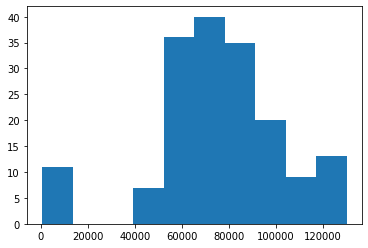

In [166]:
plt.hist(data['salary_high'])

In [163]:
word =[x.count("data engineer") for x in data['description']]

In [ ]:
## for testing formulae
#url="https://www.harnham.com/job/data-scientist-in-london-jid-2435"
#req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
#webpage=urlopen(req).read()
#page_soup = soup(webpage, "html.parser")
#a=extract_description(page_soup)

In [3]:
a=[1,"yes",[3]]
type(a[1])

str

In [9]:
i=2
if type(a[i])!="str":a[i]=str(a[i])


In [10]:
type(a[2])

str